# Anything to Image

[![PyPI](https://img.shields.io/pypi/v/anything2image)](https://pypi.org/project/anything2image/) 

Generate image from anything with [ImageBind](https://github.com/facebookresearch/ImageBind)'s unified latent space and [stable-diffusion-2-1-unclip](https://huggingface.co/stabilityai/stable-diffusion-2-1-unclip). 

- No training is need.
- Integration with 🤗  [Diffusers](https://github.com/huggingface/diffusers).
- Online demo with [Huggingface Gradio](#getting-started). 

**Support Tasks**

- [Audio to Image](#audio-to-image)
- [Audio+Text to Image](#audiotext-to-image)
- [Audio+Image to Image](#audioimage-to-image)
- [Image to Image](#image-to-image)
- [Text to Image](#text-to-image)

In [1]:
!pip install anything2image

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached pytorchvideo-0.1.5-py3-none-any.whl


## Audio to Image

/home/laizeqiang/miniconda3/envs/torch1.10/lib/python3.7/site-packages/torchvision/transforms/_functional_video.py:7: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in 0.14. Please use the 'torchvision.transforms.functional' module instead.
  "The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in 0.14. "
/home/laizeqiang/miniconda3/envs/torch1.10/lib/python3.7/site-packages/torchvision/transforms/_transforms_video.py:26: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in 0.14. Please use the 'torchvision.transforms' module instead.
  "The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in 0.14. "


  0%|          | 0/21 [00:00<?, ?it/s]

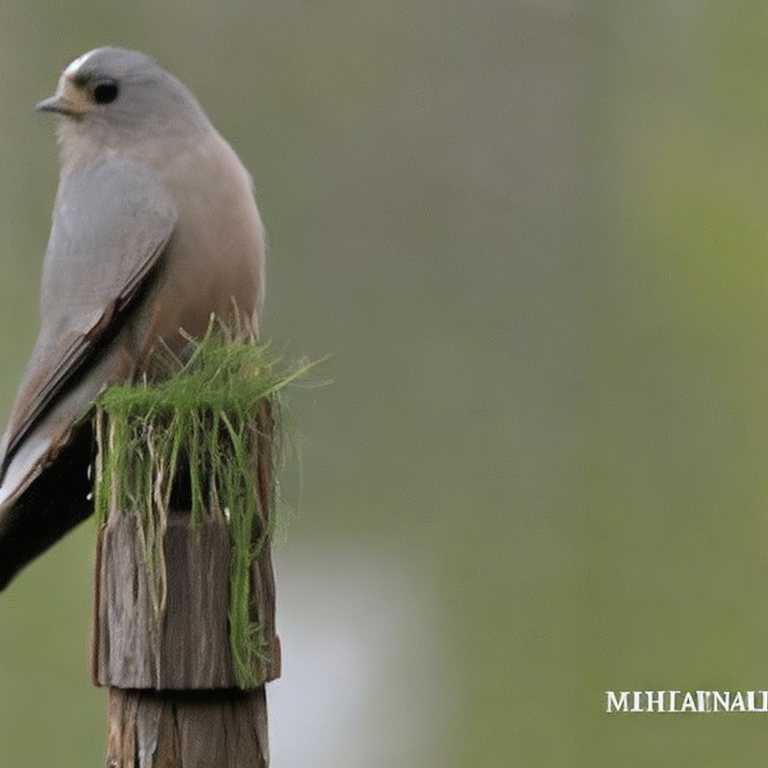

In [2]:
import anything2image.imagebind as ib
import torch
from diffusers import StableUnCLIPImg2ImgPipeline

# construct models
device = "cuda:0" if torch.cuda.is_available() else "cpu"
pipe = StableUnCLIPImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1-unclip", torch_dtype=torch.float16
).to(device)
model = ib.imagebind_huge(pretrained=True).eval().to(device)

# generate image
with torch.no_grad():
    audio_paths=["assets/wav/bird_audio.wav"]
    embeddings = model.forward({
        ib.ModalityType.AUDIO: ib.load_and_transform_audio_data(audio_paths, device),
    })
    embeddings = embeddings[ib.ModalityType.AUDIO]
    images = pipe(image_embeds=embeddings.half()).images
images[0]

## Audio+Text to Image 

  0%|          | 0/21 [00:00<?, ?it/s]

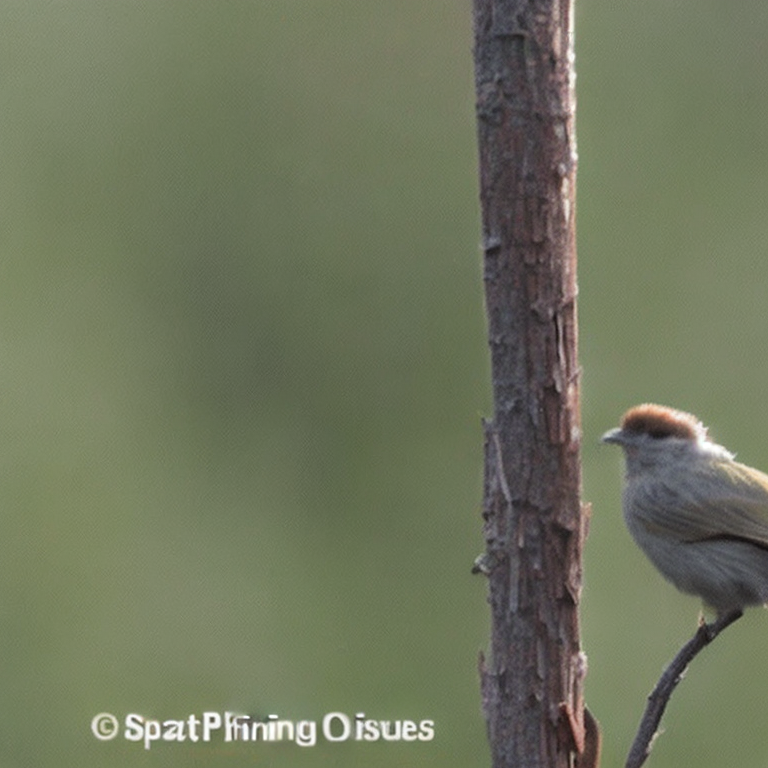

In [3]:
with torch.no_grad():
    audio_paths=["assets/wav/bird_audio.wav"]
    embeddings = model.forward({
        ib.ModalityType.AUDIO: ib.load_and_transform_audio_data(audio_paths, device),
    })
    embeddings = embeddings[ib.ModalityType.AUDIO]
    images = pipe(prompt='a painting', image_embeds=embeddings.half()).images
images[0]

## Audio+Image to Image

In [4]:
with torch.no_grad():
    embeddings = model.forward({
        ib.ModalityType.VISION: ib.load_and_transform_vision_data(["assets/image/bird.png"], device),
    })
    img_embeddings = embeddings[ib.ModalityType.VISION]
    embeddings = model.forward({
        ib.ModalityType.AUDIO: ib.load_and_transform_audio_data(["assets/wav/wave.wav"], device),
    }, normalize=False)
    audio_embeddings = embeddings[ib.ModalityType.AUDIO]
    embeddings = (img_embeddings + audio_embeddings)/2
    images = pipe(image_embeds=embeddings.half()).images
images[0]

  0%|          | 0/21 [00:00<?, ?it/s]

## Image to Image

  0%|          | 0/21 [00:00<?, ?it/s]

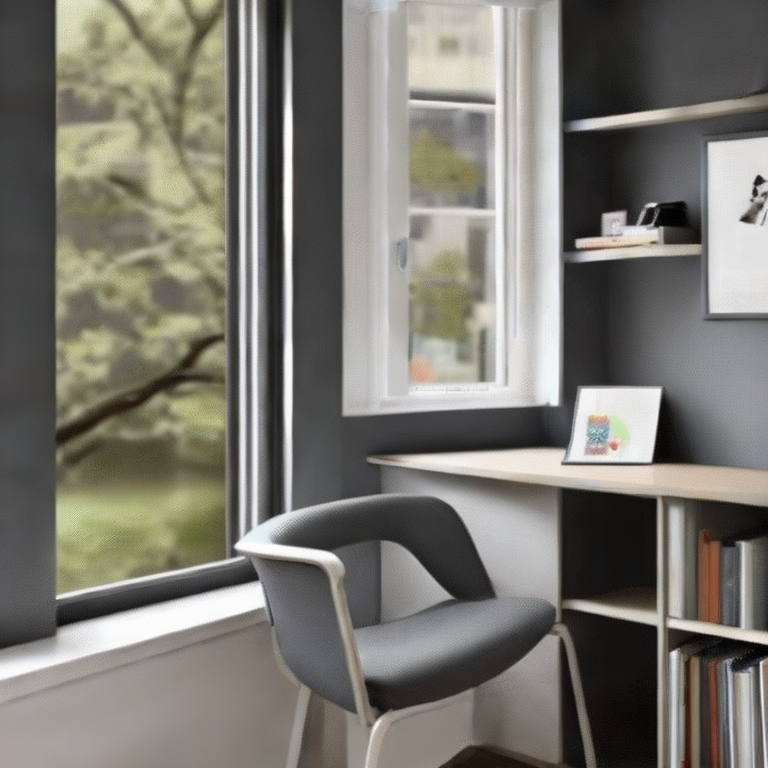

In [5]:
with torch.no_grad():
    paths=["assets/image/room.png"]
    embeddings = model.forward({
        ib.ModalityType.VISION: ib.load_and_transform_vision_data(paths, device),
    }, normalize=False)
    embeddings = embeddings[ib.ModalityType.VISION]
    images = pipe(image_embeds=embeddings.half()).images
images[0]

## Text to Image

  0%|          | 0/21 [00:00<?, ?it/s]

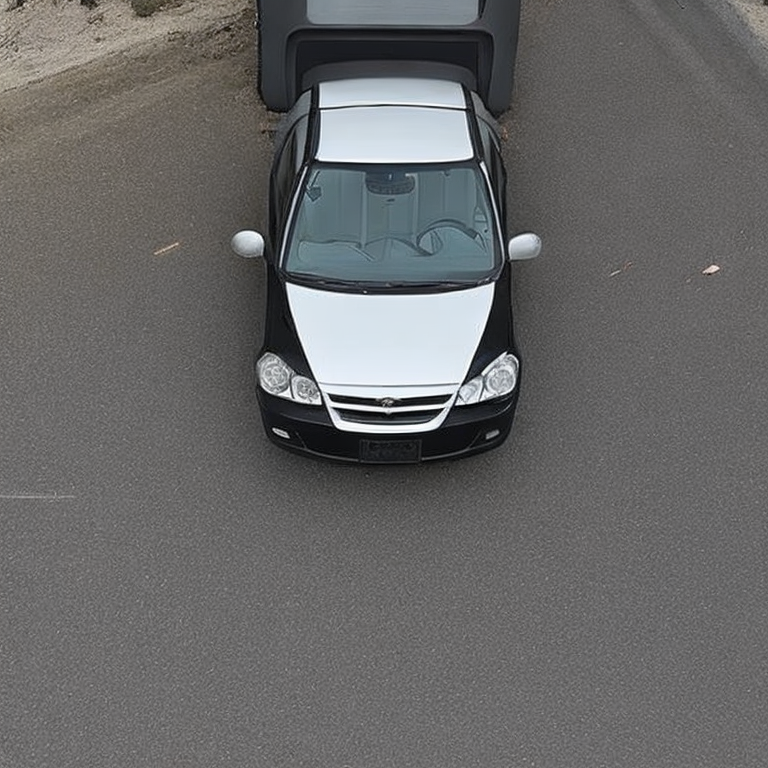

In [6]:
with torch.no_grad():
    embeddings = model.forward({
        ib.ModalityType.TEXT: ib.load_and_transform_text(['A photo of a car.'], device),
    }, normalize=False)
    embeddings = embeddings[ib.ModalityType.TEXT]
    images = pipe(image_embeds=embeddings.half()).images
images[0]